#Histogram Medyanına (Ortanca değeri) Göre Eşikleme

Giriş olarak 8-bit gri tonlamalı bir görüntü okunmuştur.

Görüntünün histogramı hesaplanmış ve normalize edilerek olasılık dağılımı elde edilmiştir.

Histogramın kümülatif dağılım fonksiyonu (CDF) kullanılarak, yoğunluk değerlerinin %50’sinin altında ve %50’sinin üstünde kaldığı medyan yoğunluk değeri belirlenmiştir.

Bu medyan değer, eşik değeri olarak kullanılarak görüntü ikili (binary) formata dönüştürülmüştür.

Sonuçlar, orijinal görüntü ile eşiklenmiş görüntü yan yana gösterilerek görselleştirilmiştir.

Bu çalışmada, eşik değeri olarak görüntü histogramının medyan değeri kullanılmıştır. Histogramın kümülatif dağılım fonksiyonu yardımıyla, yoğunluk değerlerinin yarısının altında ve yarısının üstünde kaldığı medyan seviye belirlenmiş ve bu değer kullanılarak görüntü ikili hale getirilmiştir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Histogram medyanına göre hesaplanan eşik değeri: 143


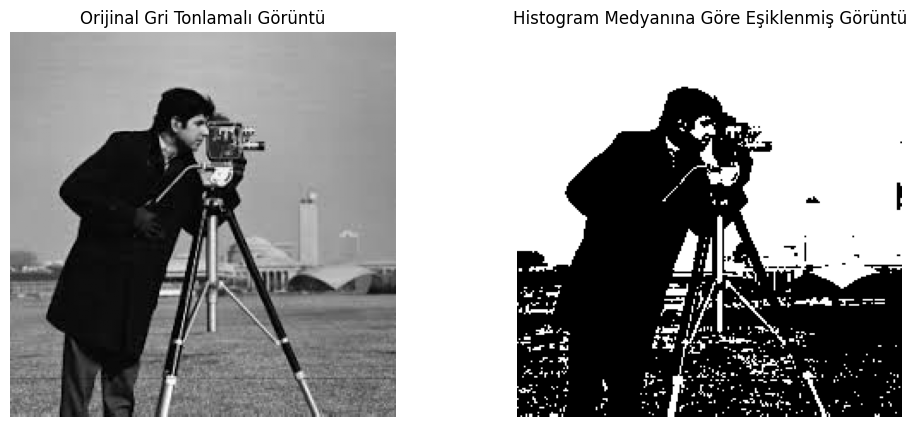

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import cv2                  # Görüntü okuma ve işleme
import numpy as np           # Sayısal işlemler
import matplotlib.pyplot as plt  # Görselleştirme

# 1. Görüntünün dosya yolundan okunması (8-bit gri tonlamalı)
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru okunup okunmadığının kontrolü
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# 2. Görüntü histogramının hesaplanması
# 256 gri seviye (0–255) için histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Histogramın normalize edilmesi (olasılık dağılımı)
histogram = histogram.flatten()
probability = histogram / histogram.sum()

# 3. Histogram medyanının (ortanca değerinin) hesaplanması
# Kümülatif dağılım fonksiyonu (CDF)
cdf = np.cumsum(probability)

# Medyan değer m: CDF >= 0.5 olan ilk yoğunluk değeri
median_threshold = np.where(cdf >= 0.5)[0][0]

print(f"Histogram medyanına göre hesaplanan eşik değeri: {median_threshold}")

# 4. Medyan değerini eşik olarak kullanarak eşikleme işlemi
# Piksel değeri >= medyan ise 255, değilse 0
binary_image = np.where(image >= median_threshold, 255, 0).astype(np.uint8)

# 5. Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Gri Tonlamalı Görüntü")
plt.axis("off")

# Eşiklenmiş (binary) görüntü
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Histogram Medyanına Göre Eşiklenmiş Görüntü")
plt.axis("off")

plt.show()
